# Home work 1: Basic Artificial Neural Networks

Credit https://github.com/yandexdataschool/YSDA_deeplearning17, https://github.com/DmitryUlyanov


Зачем это всё нужно?! Зачем понимать как работают нейросети внутри когда уже есть куча библиотек?
- Время от времени Ваши сети не учатся, веса становятся nan-ами, все расходится и разваливается -- это можно починить если понимать бекпроп
- Если Вы не понимаете как работают оптимизаторы, то не сможете правильно выставить гиперапрааметры :) и тоже ничего выучить не выйдет
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design of was heavily inspired by [Torch](http://torch.ch) which is the most convenient neural network environment when the work involves defining new layers. 

This homework requires sending **"multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- hw1_Modules.ipynb

If you want to read more about backprop this links can be helpfull:
- http://udacity.com/course/deep-learning--ud730 
- http://cs231n.stanford.edu/2016/syllabus.html 
- http://www.deeplearningbook.org 

<h1 align="center">Check Questions</h1> 

**Вопрос 1**: Чем нейросети отличаются от линейных моделей а чем похожи? 

Нейронные сети - это линейные модели, примененные последовательно и перемеженные нелинейностями. Нелинейности улучшают качество.

**Вопрос 2**: В чем недостатки полносвзяных нейронных сетей какая мотивация к использованию свёрточных?

Очень безумные вычисления! Занимают много места и времени. А сверточные умеют уменьшать размерность. А еще сверточные умеют искать предметы в любом месте, а полносвязные - только в каком-то одном.

**Вопрос 3**: Какие слои используются в современных нейронных сетях? Опишите как работает каждый слой и свою интуицию зачем он нужен.

    - DenceLayer -- обычное линейное преобразование, фактически для каждой фичи (пикселя) подбирает вес, с которым эта фича вложится в ответ.
    - Relu - нелинейность. Там, где вход больше нуля, оставляет его как есть, а где меньше - зануляет. Методом тыка выяснилось, что хорошо работает.
    - LeakRelu - еще нелинейность, но более умная: входы меньше нуля отражет от оси x и умножает на какой-то коэффициент.
    - DropOut - позволяет сделать как бы случайный подграф сети нашего графа. поскольку полносвязные слои в большинстве своем избыточны, подобное случайное выбрасывание фичей, помогает.
    - SoftMax - приводит вещественные признаки к форме вероятностей на отрезке [0, 1], так, чтобы сумма по строкам была единицей.
    - слои, которые вычисляют функции потерь: MDE, LogLoss
    
    
**Вопрос 4**: Может ли нейросеть решать задачу регрессии, какой компонент для этого нужно заменить в нейросети из лекции 1?

А какая лекция первая? ну она ее вроде и решает, если функцию потерь сделать MSE


**Вопрос 5**: Почему обычные методы оптимизации плохо работают с нейросетями? А какие работают хорошо? Почему они работают хорошо?

Потому что градиенты, умножаясь друг на друга, затухают. А еще потому что фичей так много, что часто градиентный спуск не может выбраться из "седла". Или наоборот, начинает шагать слишком большими шагами и все время попадает не туда.
Можно учить сеточку постепенно: сначала научить нижние уровни, закрепить их, учить верхние. Можно добавить шорткаты: это когда функция, вычисляемая каким-то учатком нейронной сети, применяется к результату и добавляетя к нему. Таким образом, у нас становится как бы много паралелльных сетей, которые по-разному обучаются на разных входах.

**Вопрос 6**: Для чего нужен backprop, чем это лучше/хуже чем считать градиенты без него? Почему backprop эффективно считается на GPU?

Почему эффективно считается: backprop состоит из перемножения матриц, а оно отлично параллелиться на много-много ядер (как в гпу).
Для чего нужен: если пытаться втупую посчитать градиенты для всех слоев, то мы будем обучать сети годами, а между тем, по факту будет просто выполняться одна и та же работа по нескольку раз, ведь производная по весам какого-нибудь первого слоя - это производная сложной функции, и считается она по chain rule - и вот мы снова приходим к идее backpropa.

**Вопрос 7**: Почему для нейросетей не используют кросс валидацию, что вместо неё? Можно-ли ее использовать?

Нейронка и так учится неделями, какая уж тут кросс-валидация. Вместо нее просто смотрят, как с ростом итераций уменьшается ошибка на трейне.

**Вопрос 8**: Небольшой quiz который поможет разобраться со свертками https://www.youtube.com/watch?v=DDRa5ASNdq4 

<img src="conv.png" width="600">

<Ответ-Картинка :)>


-------------

Политика списывания. Вы можете обсудить решение с одногрупниками, так интереснее и веселее :) 
Не шарьте друг-другу код, в этом случаи вы ничему не научитесь -- "мыши плакали кололись но продолжали жрать кактус".

Теперь формально. Разница между списыванием и помощью товарища иногда едва различима. Мы искренне надеемся, что при любых сложностях вы можете обратиться к семинаристам и с их подсказками **самостоятельно** справиться с заданием. При зафиксированных случаях списывания (одинаковый код, одинаковые ошибки), баллы за задание будут обнулены всем участникам инцидента.

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Важно 

    - Не забывайте делать GradCheck, чтобы проверить численно что производные правильные, обычно с первого раза не выходит никогда,   пример тут https://goo.gl/pzvzfe 
    - Ваш код не должен содержать циклов, все вычисления должны бить векторные, внутри numpy 
    

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return AND store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [67]:
"""
    --------------------------------------
    -- Tech note
    --------------------------------------
    Inspired by torch I promise to use
    
    np.multiply, np.add, np.divide, np.subtract instead of *,+,/,-
    for better memory handling and only them. 
    Inspired by Joan Rowling I promise to use magic outside Phystech.
        
    Suppose you allocated a variable    
        
        a = np.zeros(...)
    
    So, instead of
    
        a = b + c  # will be reallocated, GC needed to free
    
    I would go for: 
    
        np.add(b,c,out = a) # puts result in `a`
    
    But it is completely up to you.
"""
%run hw1_Modules.ipynb

Optimizer is implemented for you. 

In [68]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            
            cur_x -= cur_old_grad
            i += 1     

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

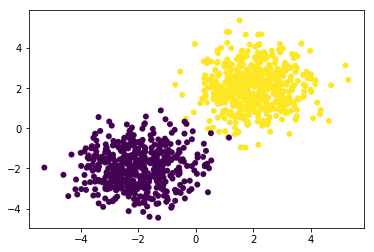

In [69]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [70]:
net = Sequential()
net.add(Linear(2, 2))
net.add(Linear(2, 4))
net.add(LeakyReLU())
# net.add(Linear(4, 8))
# net.add(ReLU())
# net.add(Linear(8, 4))
# net.add(Dropout())
net.add(Linear(4, 2))
# net.add(ReLU())
# net.add(Linear(2, 2))
net.add(SoftMax())


criterion = ClassNLLCriterion()
# criterion = MSECriterion()

print(net)

# Test something like that then 

# net = Sequential()
# net.add(Linear(2, 2))
# criterion = MSECriterion()
# # net.add(SoftMax())

Linear 2 -> 2
Linear 2 -> 4
LeakyReLU
Linear 4 -> 2
SoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [71]:
# Iptimizer params
optimizer_config = {'learning_rate' : 0.01, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 30
batch_size = 128

In [72]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

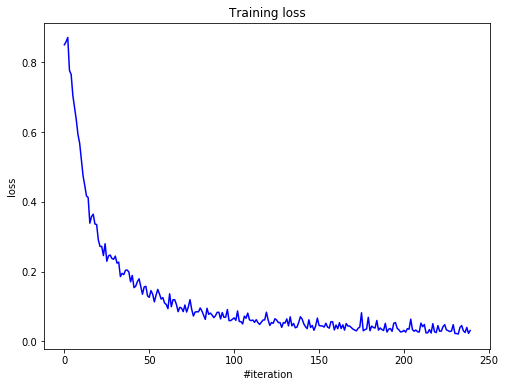

Current loss: 0.030799


In [73]:
loss_history = []

for i in range(n_epoch):
#     j = 0
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
#         print(predictions)
        loss = criterion.forward(predictions, y_batch)
        
#         j += 1
#         if i == 0 and j == 1:
#             print (loss)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. Lets start with [cool visualization](http://scs.ryerson.ca/~aharley/vis/). The most beautiful demo is the second one, if you are not familiar with convolutions you can return to it in several lectures. 

In [74]:
import os
import tensorflow.examples.tutorials.mnist.input_data as input_data
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        Y = data['y']
else:
    mnist = input_data.read_data_sets("MNIST")
    X, Y = mnist.train.images / 255.0, mnist.train.labels
    X = X[1000]
    Y  = Y[1000]
    np.savez('mnist.npz', X=X, y=y)

One-hot encode the labels first.

In [75]:
def encode(x):
    new_arr = np.zeros(n_labels + 1)
    new_arr[x] = 1
    return new_arr
    
n_labels = np.max(Y)
Y = np.array(list(map(encode, Y))).astype(float)
# Your code goes here. ################################################

- **Compare** `ReLU`, `ELU` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

In [103]:
# net = Sequential()
# net.add(Linear(784, 512))
# net.add(Dropout())
# net.add(Linear(512, 256))
# net.add(LeakyReLU())
# net.add(Linear(256, 128))
# net.add(LeakyReLU())
# net.add(Linear(128, 30))
# net.add(Linear(30, 10))
# net.add(SoftMax())
# criterion = ClassNLLCriterion()
net = Sequential()
net.add(Linear(28 * 28, 100))
net.add(LeakyReLU())
net.add(Linear(100, 10))
net.add(LeakyReLU())
net.add(SoftMax())

In [104]:
# Iptimizer params
optimizer_config = {'learning_rate' : 0.01, 'momentum': 0.99}
optimizer_state = {}

# Looping params
n_epoch = 150
batch_size = 128

**Finally**, use all your knowledge to build a super cool model on this dataset, do not forget to split dataset into train and validation. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. 

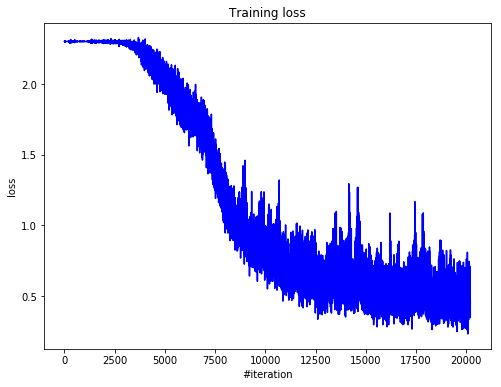

Current loss: 0.361763


KeyboardInterrupt: 

In [105]:
loss_history = []

for i in range(n_epoch):
#     j = 0
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
#         print(predictions)
        loss = criterion.forward(predictions, y_batch)
        
#         j += 1
#         if i == 0 and j == 1:
#             print (loss)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

Ну вот как-то так

In [106]:
import os
import tensorflow.examples.tutorials.mnist.input_data as input_data
from sklearn.datasets import fetch_mldata

mnist = input_data.read_data_sets("MNIST")
X_test, Y_test = mnist.test.images / 255.0, mnist.test.labels
#     X = X[1000]
#     Y  = Y[1000]
# np.savez('mnist.npz', X=X, y=y)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


Print here your accuracy. It should be around 90%.

In [107]:
from sklearn.metrics import accuracy_score
y_predicted = net.forward(X_test)
y_predicted = np.argmax(y_predicted, axis=1)
accuracy_score(y_predicted, Y_test)

0.80979999999999996

Ну если бы запустили бы нормальную сеть, да на 1000 эпох, то может что-то бы и получилось

**Оформление дз**: заполните форму тут https://goo.gl/forms/Jx3OR5Ijjg2MwfKs2 
----------
**PS**: Напоминаем, что дедлайны жесткие, прием дз заканчивается ровно в дедлайн

# Bonus Part: Autoencoder 

This part is **OPTIONAL**, you may not do it. It will not be scored, but it is easy and interesting.

Now we are going to build a cool model, named autoencoder. The aim is simple: **encode** the data to a lower dimentional representation. Why? Well, if we can **decode** this representation back to original data with "small" reconstuction loss then we can store only compressed representation saving memory. But the most important thing is -- we can reuse trained autoencoder for classification. 
<img src="autoencoder.png">

Picture from this [site](http://multithreaded.stitchfix.com/blog/2015/09/17/deep-style/).

Now implement an autoencoder:

Build it such that dimetionality inside autoencoder changes like that: 

$$784 \text{ (data)} -> 512 -> 256 -> 128 -> 30 -> 128 -> 256 -> 512 -> 784$$

Use **MSECriterion** to score the reconstruction.

You may train it for 9 epochs with batch size = 256, initial lr = 0.1 droping by a factor of 2 every 3 epochs. The reconstruction loss should be about 6.0 and visual quality decent already.
Do not spend time on changing architecture, they are more or less the same. 

In [90]:
autoenc = Sequential()
autoenc.add(Linear(784, 512))
autoenc.add(ReLU())
autoenc.add(Linear(512, 256))
autoenc.add(ReLU())
autoenc.add(Linear(256, 128))
autoenc.add(ReLU())
autoenc.add(Linear(128, 30))
autoenc.add(ReLU())
autoenc.add(Linear(30,128))
autoenc.add(ReLU())
autoenc.add(Linear(128, 256))
autoenc.add(ReLU())
autoenc.add(Linear(256, 512))
autoenc.add(ReLU())
autoenc.add(Linear(512,784))

# criterion = ClassNLLCriterion()
criterion = MSECriterion()

In [114]:
def learn(net, X, Y, lr=0.1, mom=0.9):
    # Iptimizer params
    optimizer_config = {'learning_rate' : lr, 'momentum': mom}
    optimizer_state = {}

    # Looping params
    n_epoch = 100
    batch_size = 128
    loss_history = []

    for i in range(n_epoch):
    #     j = 0
        for x_batch, y_batch in get_batches((X, Y), batch_size):
            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
    #         print(predictions)
            loss = criterion.forward(predictions, y_batch)

    #         j += 1
    #         if i == 0 and j == 1:
    #             print (loss)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            sgd_momentum(net.getParameters(), 
                         net.getGradParameters(), 
                         optimizer_config,
                         optimizer_state)      

            loss_history.append(loss)

        # Visualize
        display.clear_output(wait=True)
        plt.figure(figsize=(8, 6))

        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b')
        plt.show()

        print('Current loss: %f' % loss)    
    return net

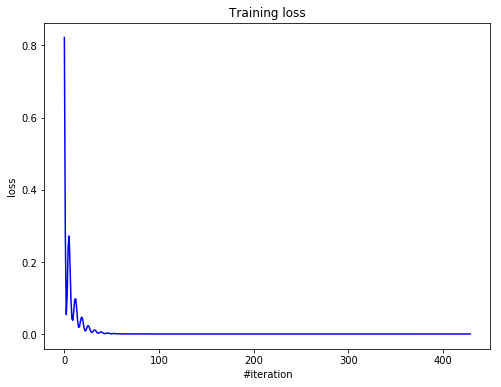

Current loss: 0.000792


KeyboardInterrupt: 

In [92]:
autoenc = learn(autoenc, X, X)

Some time ago NNs were a lot poorer and people were struggling to learn deep models. To train a classification net people were training autoencoder first (to train autoencoder people were pretraining single layers with [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)), then substituting the decoder part with classification layer (yeah, they were struggling with training autoencoders a lot, and complex techniques were used at that dark times). We are going to this now, fast and easy.  

In [93]:
# Now chop off decoder part
# (you may need to implement `remove` method for Sequential container) 
# Your code goes here. ################################################
for i in range(8):
    autoenc.pop()

In [110]:
# Extract inner representation for train and validation, 
# you should get (n_samples, 30) matrices
# Your code goes here. ################################################
repr_X = autoenc.forward(X)

In [111]:
Y.shape

(55000, 10)

In [112]:
repr_X.shape

(55000, 30)

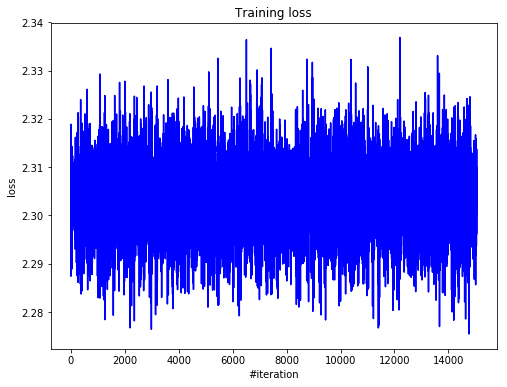

Current loss: 2.300372


KeyboardInterrupt: 

In [116]:
cnet = Sequential()
cnet.add(Linear(30, 10))
cnet.add(SoftMax())
criterion = ClassNLLCriterion()
# criterion = MSECriterion()
cnet = learn(cnet, repr_X, Y, 0.01, 0.99)


In [117]:
autoenc.add(cnet[0])
# autoenc.add(cnet[1])

In [118]:
from sklearn.metrics import accuracy_score
y_predicted = autoenc.forward(X_test)
y_predicted = np.argmax(y_predicted, axis=1)
accuracy_score(y_predicted, Y_test)

0.1009

эээ ну ок

Градиент нормальный

In [60]:
from scipy.optimize import check_grad
module = Sequential()
module.add(Linear(10,5))
module.evaluate()
criterion = MSECriterion()
grads = []
for i in range(20):
    for j in range(5):
        get_func = lambda x: module.forward(x.reshape(20, 10))[i, j]
        def get_grad(x):
            module.forward(x.reshape(20, 10))
            inn = np.zeros(shape=(20, 5))
            inn[i, j] = 1
            grad = module.backward(x.reshape(20, 10), inn).reshape(-1)
            return grad
        grads.append(check_grad(get_func, get_grad, np.random.random((20, 10)).reshape(-1)))
max(grads)

2.3516801234609284e-08

* What do you think, does it make sense to build real-world classifiers this way ? Did it work better for you than a straightforward one? Looks like it was not the same ~8 years ago, what has changed beside computational power? 

Run PCA with 30 components on the *train set*, plot original image, autoencoder and PCA reconstructions side by side for 10 samples from *validation set*.
Probably you need to use the following snippet to make aoutpencoder examples look comparible.